# Load packages and dataframes

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from anndata import AnnData, read_h5ad
import singlecellmultiomics.bamProcessing.bamToRNACounts

#scv.settings.verbosity = 3 # show errors(0), warnings(1), info(2), hints(3)
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

#scv.settings.presenter_view = True  # set max width size for presenter view
#scv.set_figure_params('scvelo')  # for beautified visualization
sc.set_figure_params(dpi=100, color_map = 'viridis')

scanpy==1.6.0 anndata==0.7.5 umap==0.4.6 numpy==1.19.4 scipy==1.6.0 pandas==1.2.0 scikit-learn==0.24.0 statsmodels==0.12.1 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [2]:
pathToData = '/Users/m.blotenburg/Documents/Projects/TCHIC/data/rep2/20210215_OUD5651_K27me3K4me3_day5_20201023fixed/'

In [3]:
results_file = pathToData + 'dataframes/ScanpyOnChICData_k27.h5ad'

In [4]:
TSS_table_k27 = pd.read_csv(pathToData + 'k27me3/chic/K27me3_TSS_count_table.csv', index_col=(0,1,2,3), 
                        header= 0, low_memory=False)
TSS_table_k27 = TSS_table_k27.iloc[1:]
TSS_table_k27.index.names = ['reference_name','start','end', 'bname']
TSS_table_k27.head(2)

PZ-MB-TChIC-Gastd5-rep2-H3K27me3-4_266  \
reference_name start     end       bname                                             
1              195254848 195264848 Gm38046                                     1.0   
               195236007 195246007 Gm27940                                     1.0   

                                            PZ-MB-TChIC-Gastd5-rep2-H3K27me3-4_306  \
reference_name start     end       bname                                             
1              195254848 195264848 Gm38046                                     1.0   
               195236007 195246007 Gm27940                                     2.0   

                                            PZ-MB-TChIC-Gastd5-rep2-H3K27me3-6_237  \
reference_name start     end       bname                                             
1              195254848 195264848 Gm38046                                     1.0   
               195236007 195246007 Gm27940                                     NaN   

                                            PZ-MB-TChIC-Gastd5-rep2-H3K27me3-5_126  \
reference_name start     end       bname                                             
1              195254848 195264848 Gm38046                                     1.0   
               195236007 195246007 Gm27940                                     NaN   

                                            PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_292  \
reference_name start     end       bname                                             
1              195254848 195264848 Gm38046                                     1.0   
               195236007 195246007 Gm27940                                     NaN   

                                            PZ-MB-TChIC-Gastd5-rep2-H3K27me3-6_273  \
reference_name start     end       bname                                             
1              195254848 195264848 Gm38046                                     1.0   
               195236007 195246007 Gm27940                                     NaN   

                                            PZ-MB-TChIC-Gastd5-rep2-H3K27me3-5_174  \
reference_name start     end       bname                                             
1              195254848 195264848 Gm38046                                     2.0   
               195236007 195246007 Gm27940                                     NaN   

                                            PZ-MB-TChIC-Gastd5-rep2-H3K27me3-3_104  \
reference_name start     end       bname                                             
1              195254848 195264848 Gm38046                                     1.0   
               195236007 195246007 Gm27940                                     NaN   

                                            PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_263  \
reference_name start     end       bname                                             
1              195254848 195264848 Gm38046                                     2.0   
               195236007 195246007 Gm27940                                     NaN   

                                            PZ-MB-TChIC-Gastd5-rep2-H3K27me3-4_382  \
reference_name start     end       bname                                             
1              195254848 195264848 Gm38046                                     1.0   
               195236007 195246007 Gm27940                                     NaN   

                                            ...  \
reference_name start     end       bname    ...   
1              195254848 195264848 Gm38046  ...   
               195236007 195246007 Gm27940  ...   

                                            PZ-MB-TChIC-Gastd5-rep2-H3K27me3-3_161  \
reference_name start     end       bname                                             
1              195254848 195264848 Gm38046                                     NaN   
               195236007 195246007 Gm27940                                     NaN   

                                            

In [5]:
TSS_k27 = TSS_table_k27.droplevel(['start', 'end', 'reference_name'], axis=0)
TSS_k27.head(2)

PZ-MB-TChIC-Gastd5-rep2-H3K27me3-4_266  \
bname                                             
Gm38046                                     1.0   
Gm27940                                     1.0   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-4_306  \
bname                                             
Gm38046                                     1.0   
Gm27940                                     2.0   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-6_237  \
bname                                             
Gm38046                                     1.0   
Gm27940                                     NaN   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-5_126  \
bname                                             
Gm38046                                     1.0   
Gm27940                                     NaN   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_292  \
bname                                             
Gm38046                                     1.0   
Gm27940                                     NaN   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-6_273  \
bname                                             
Gm38046                                     1.0   
Gm27940                                     NaN   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-5_174  \
bname                                             
Gm38046                                     2.0   
Gm27940                                     NaN   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-3_104  \
bname                                             
Gm38046                                     1.0   
Gm27940                                     NaN   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_263  \
bname                                             
Gm38046                                     2.0   
Gm27940                                     NaN   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-4_382  ...  \
bname                                            ...   
Gm38046                                     1.0  ...   
Gm27940                                     NaN  ...   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-3_161  \
bname                                             
Gm38046                                     NaN   
Gm27940                                     NaN   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-3_158  \
bname                                             
Gm38046                                     NaN   
Gm27940                                     NaN   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-2_352  \
bname                                             
Gm38046                                     NaN   
Gm27940                                     NaN   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-2_253  \
bname                                             
Gm38046                                     NaN   
Gm27940                                     NaN   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-3_280  \
bname                                             
Gm38046                                     NaN   
Gm27940                                     NaN   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-6_287  \
bname                                             
Gm38046                                     NaN   
Gm27940                                     NaN   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_203  \
bname                                             
Gm38046                                     NaN   
Gm27940                                     NaN   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_183  \
bname                                             
Gm38046                                     NaN   
Gm27940                                     NaN   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_137  \
bname                                             
Gm38046                                     NaN   
Gm27940                                     NaN   

         PZ-MB-TChIC-Gastd5-rep2-H3K27me3-5_382  
bname                                       

In [6]:
df = TSS_k27

In [7]:
df = df.fillna(0)

In [8]:
df = df.loc[df.index.dropna()]

In [9]:
df = df.astype(float)

In [10]:
df.shape

(52355, 1841)

In [11]:
adata = sc.AnnData(df.transpose())

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


# Pre-processing, QC, normalisation

In [12]:
adata.var_names_make_unique()

normalizing counts per cell
    finished (0:00:00)


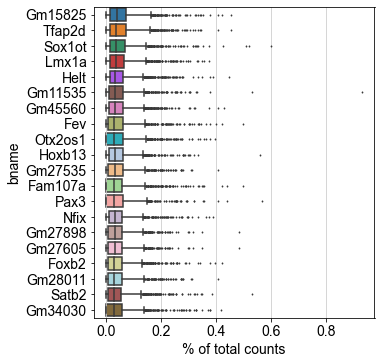

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [14]:
adata.obs['n_counts'] = adata.X.sum(axis=1)

<AxesSubplot:xlabel='n_counts', ylabel='Count'>

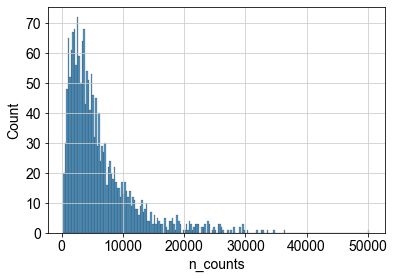

In [15]:
sns.histplot(adata.obs['n_counts'],bins=200)

In [16]:
minCount = 1000
sc.pp.filter_cells(adata, min_counts=minCount)

filtered out 95 cells that have less than 1000 counts


In [17]:
sc.pp.filter_cells(adata, min_genes=100)

In [18]:
sc.pp.filter_genes(adata, min_cells=2)

filtered out 474 genes that are detected in less than 2 cells


In [19]:
sc.pp.filter_cells(adata,max_counts=35000)

filtered out 2 cells that have more than 35000 counts


In [20]:
adata

AnnData object with n_obs × n_vars = 1744 × 51881
    obs: 'n_counts', 'n_genes'
    var: 'n_cells'

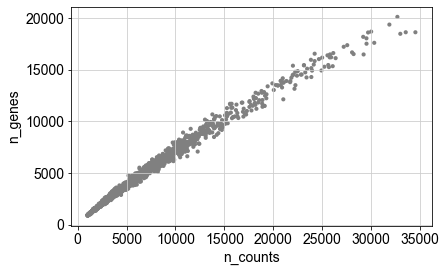

In [21]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [22]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=minCount)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [23]:
sc.pp.log1p(adata)

In [24]:
adata.raw = adata

In [25]:
#sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [26]:
#sc.pl.highly_variable_genes(adata)

In [27]:
sc.pp.scale(adata, max_value=100)

normalizing counts per cell
    finished (0:00:00)


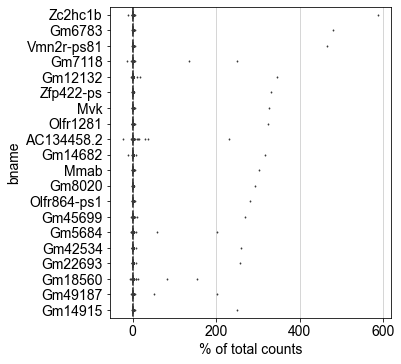

In [28]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [29]:
adata.var

n_cells      mean       std
bname                                   
Gm38046           16  0.001549  0.020920
Gm27940          291  0.027146  0.076669
Gm37887          198  0.016449  0.058087
Cr2              367  0.037924  0.091500
Gm37132          158  0.012691  0.050819
...              ...       ...       ...
Gm13290            2  0.000402  0.012171
Gm13170            2  0.000153  0.004822
Snord116l10        2  0.000374  0.011411
Snord116l9         2  0.000374  0.011411
Snord116l1         2  0.000374  0.011411

[51881 rows x 3 columns]

# PCA, umap and plotting functions

In [30]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:08)


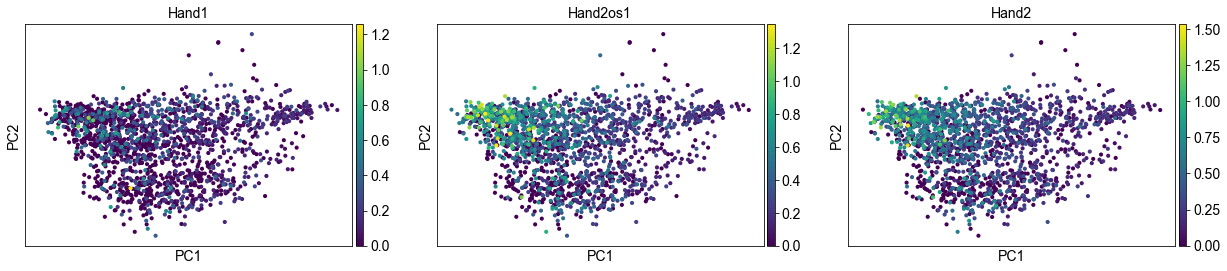

In [31]:
plotgene = [geneName for geneName in adata.var.index if any( (b in geneName for b in ['Hand']) )]
sc.pl.pca(adata, color=plotgene)

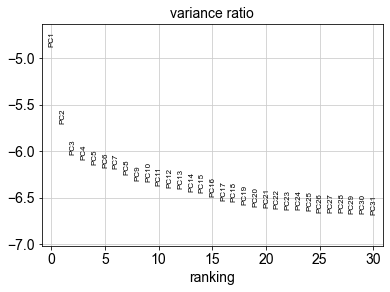

In [32]:
sc.pl.pca_variance_ratio(adata, log=True)

In [33]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [34]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


In [35]:
batches = [ob.split('_')[0] for ob in adata.obs_names]
days = [ob.split('-')[3] for ob in batches]
reps = [ob.split('-')[4] for ob in batches]
marks = [ob.split('-')[5] for ob in batches]

adata.obs['batch'] = batches 
adata.obs['day'] = days 
adata.obs['mark'] = marks 
adata.obs['rep'] = reps

... storing 'batch' as categorical
... storing 'day' as categorical
... storing 'mark' as categorical
... storing 'rep' as categorical


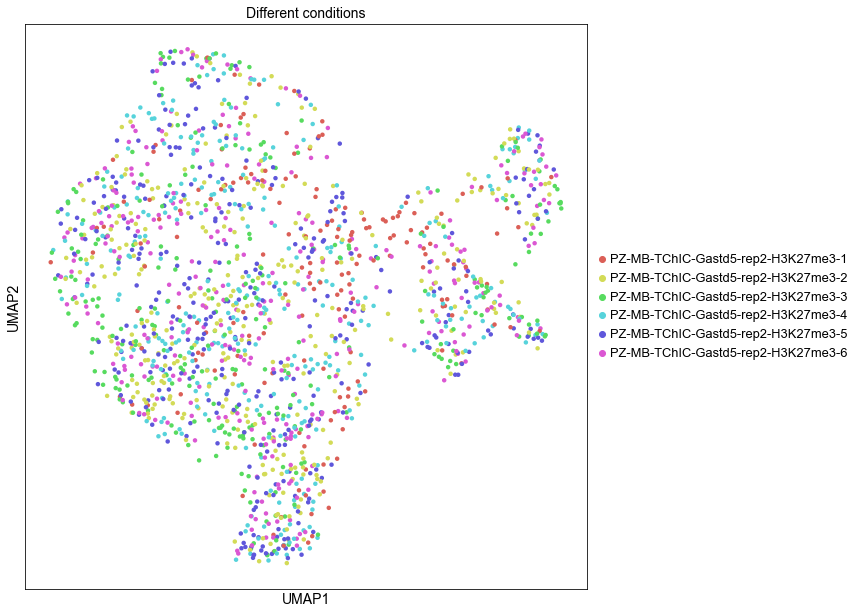

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
ax=sc.pl.umap(adata, color='batch',ax=ax, palette=sns.color_palette("hls", 6),size=80,
              title = 'Different conditions')

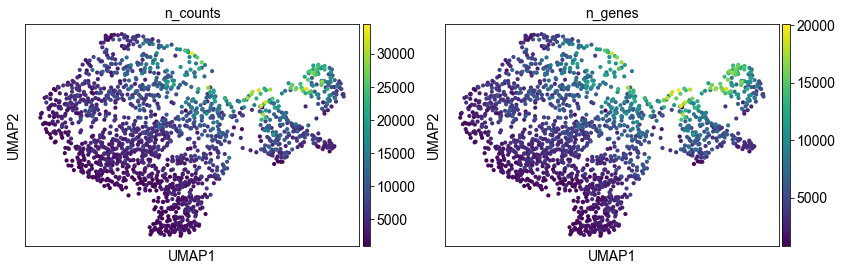

In [37]:
sc.pl.umap(adata, color=['n_counts', 'n_genes'], use_raw=True)

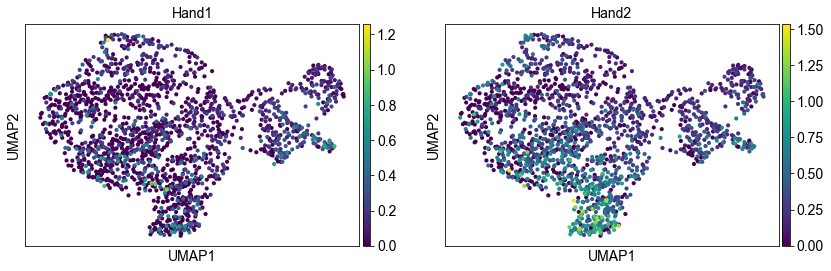

In [38]:
sc.pl.umap(adata, color=['Hand1', 'Hand2'])

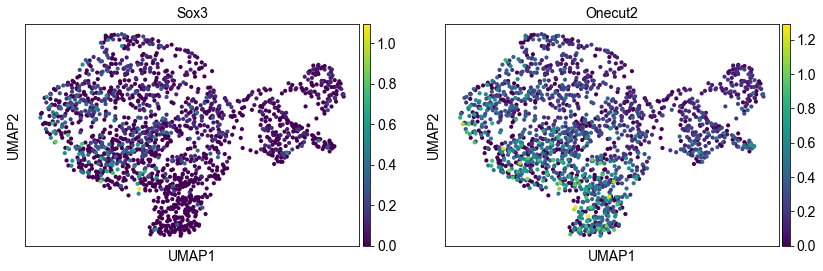

In [39]:
sc.pl.umap(adata, color=['Sox3', 'Onecut2'])

In [40]:
sc.tl.louvain(adata)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 10 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


In [41]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 12 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


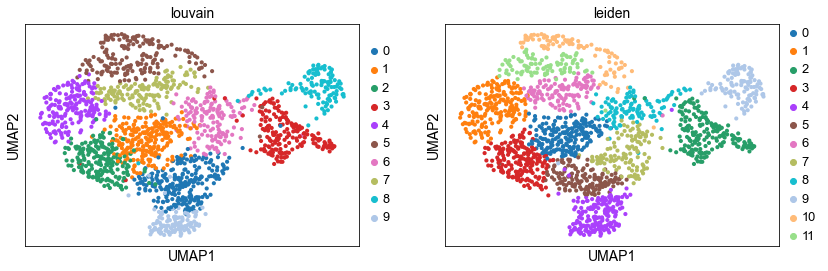

In [42]:
sc.pl.umap(adata, color=['louvain', 'leiden'])

In [43]:
hox = adata.var.filter(regex=r'Hox', axis=0).index

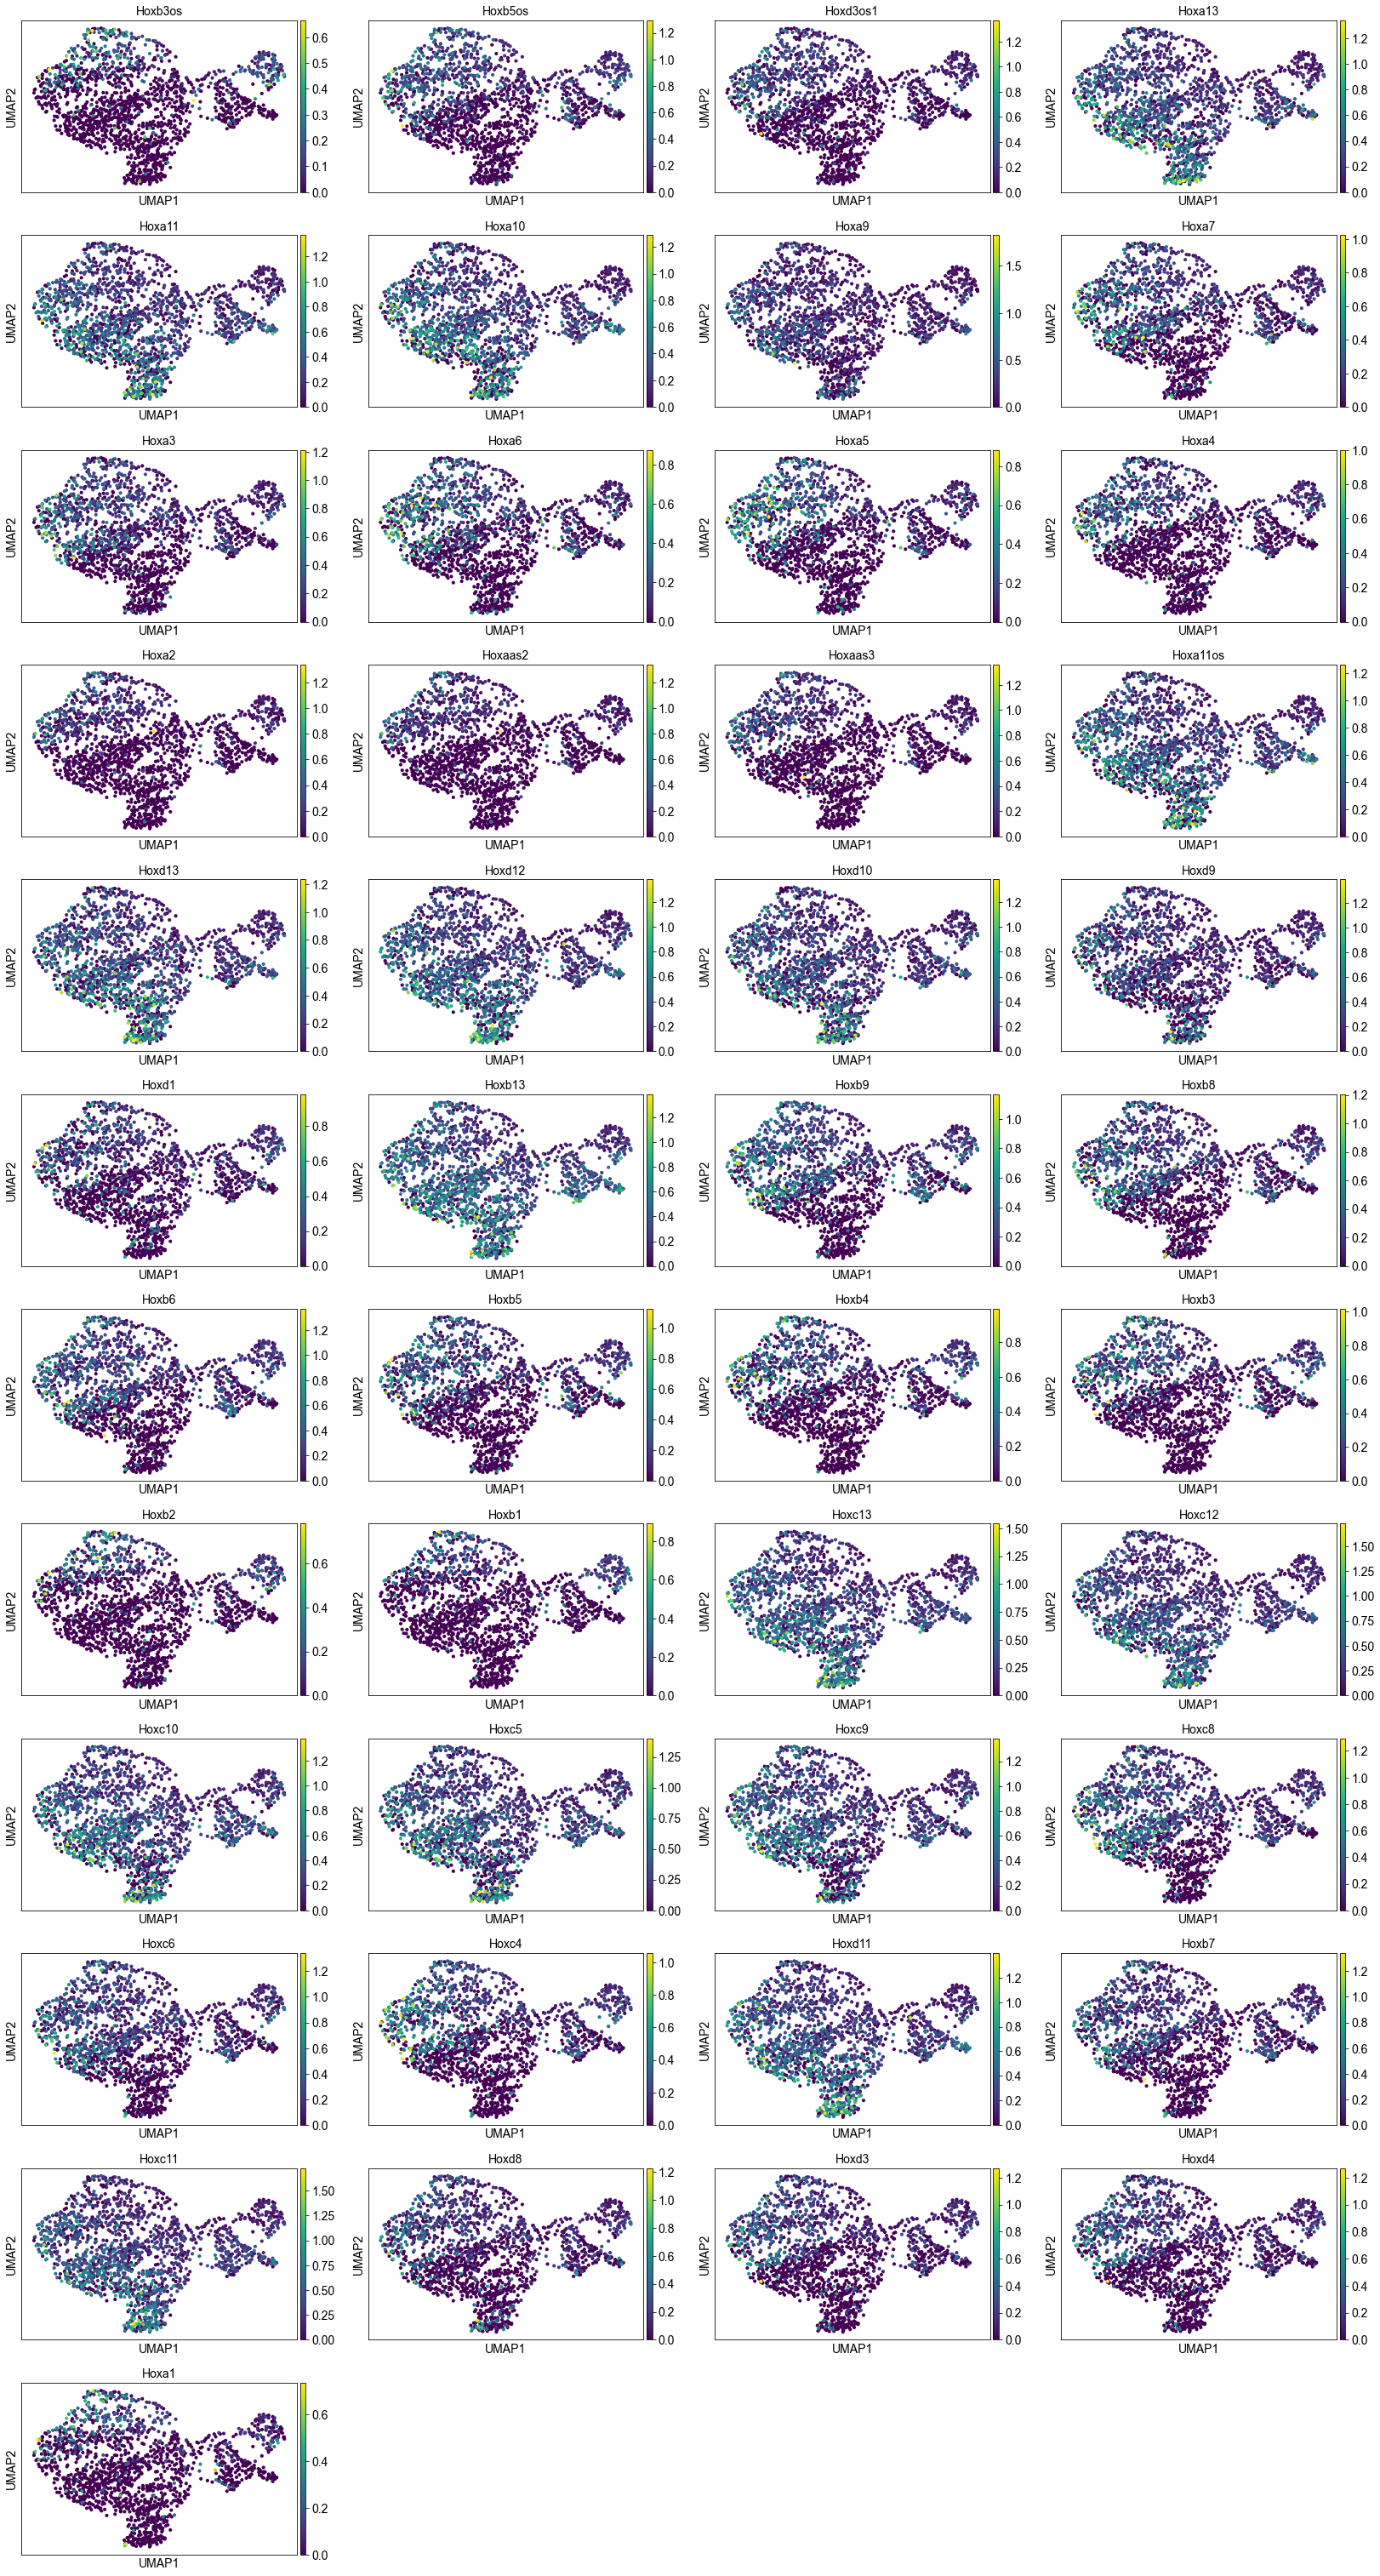

In [44]:
sc.pl.umap(adata, color=hox, use_raw=True, color_map = 'viridis')

# Finding marker genes

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:07)


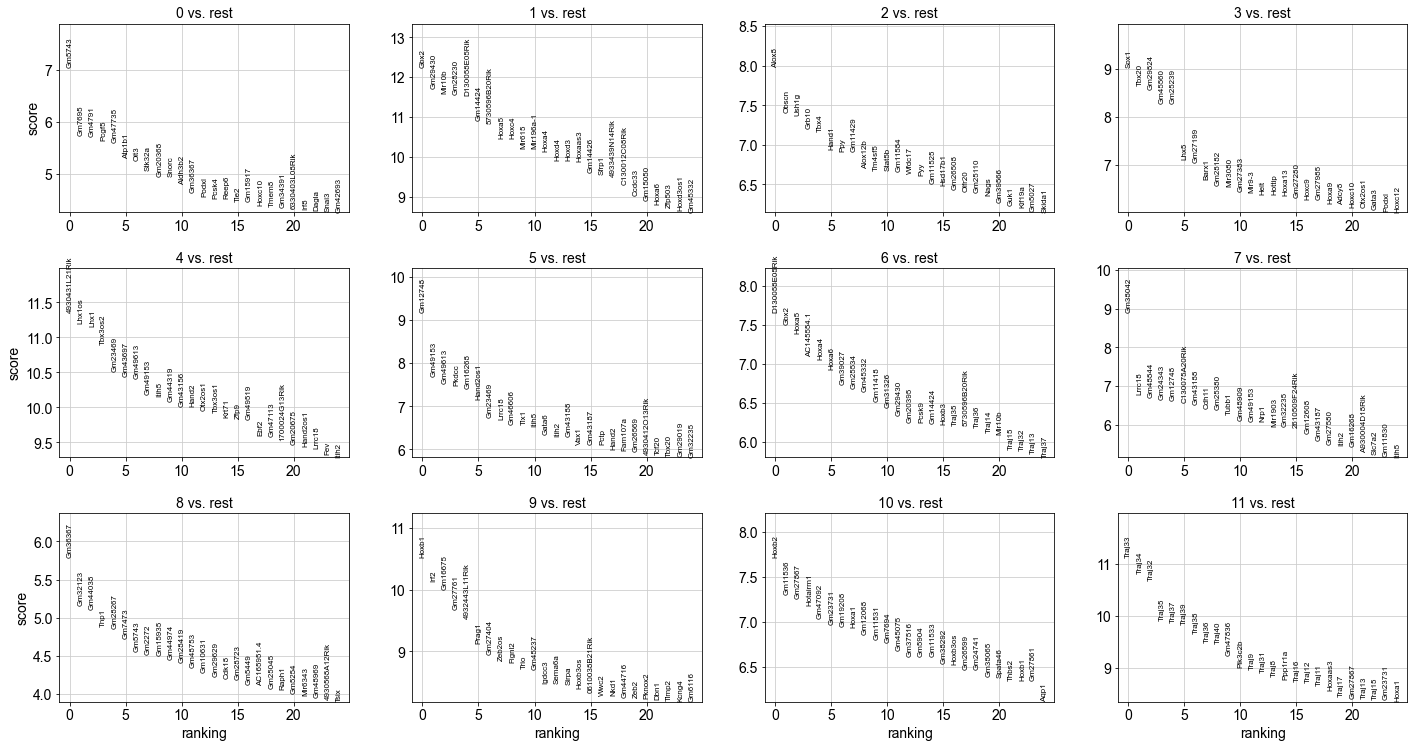

In [45]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [46]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes
    finished (0:00:13)


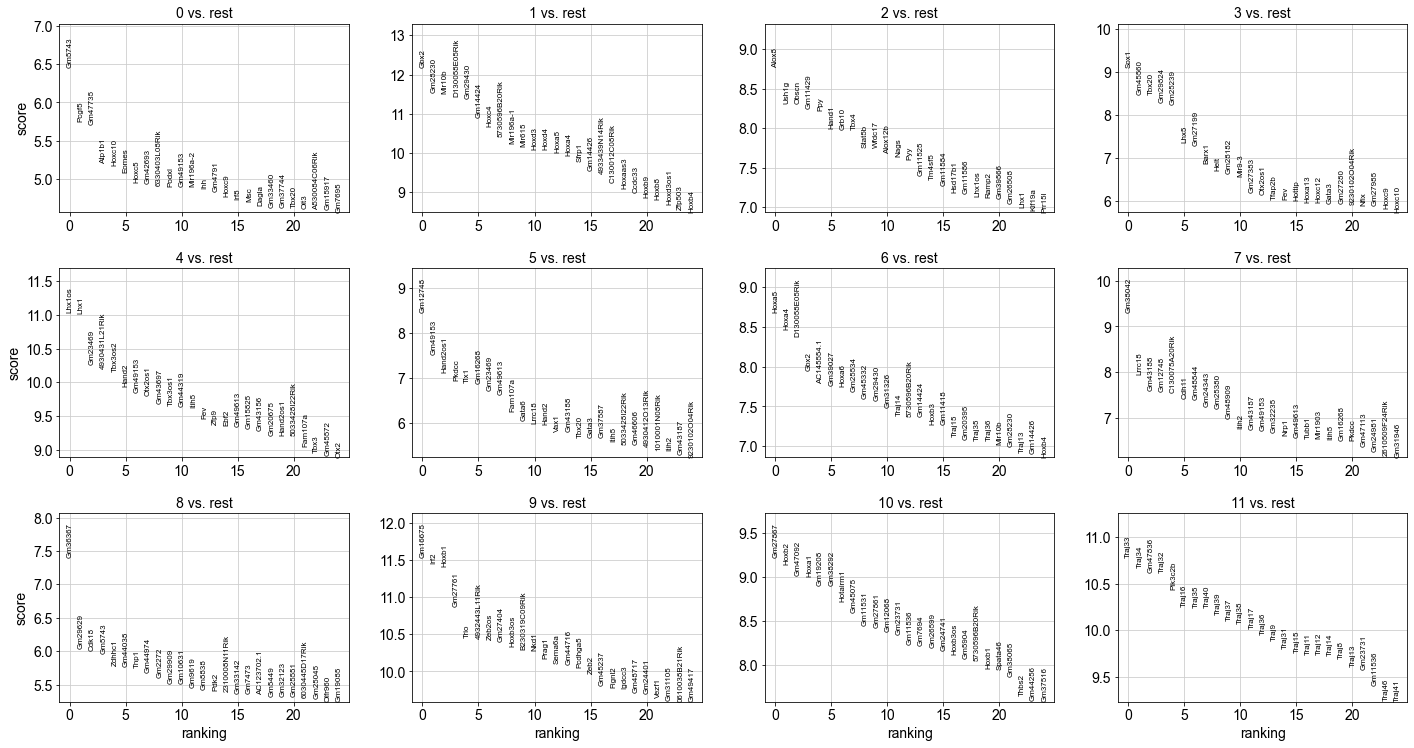

In [47]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [48]:
adata.write(results_file)

ranking genes


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


    finished (0:00:30)


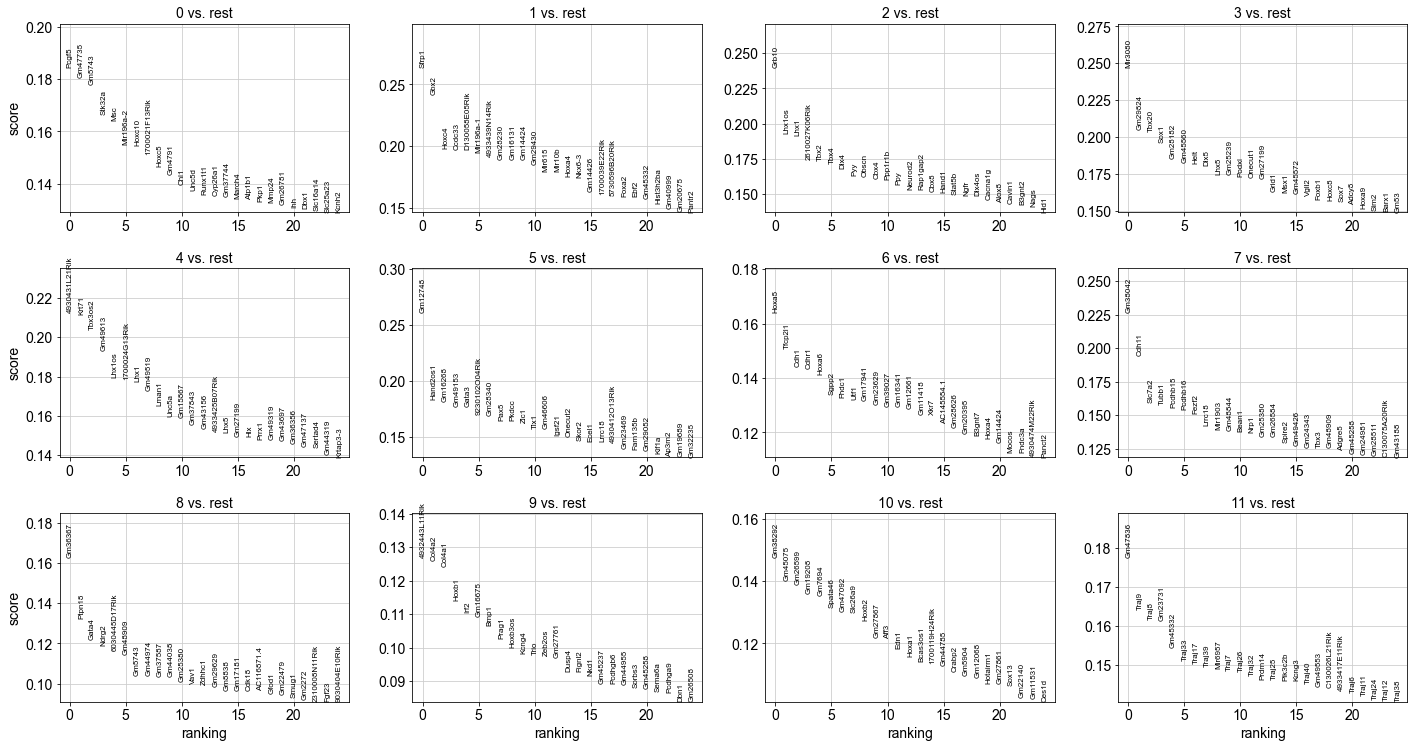

In [49]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [50]:
adata = sc.read(results_file)

In [51]:
pd.set_option('display.max_columns', None)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)

0              1        2        3              4  \
0          Gm5743           Gbx2    Alox8     Sox1         Lhx1os   
1           Pcgf5        Gm28230    Ush1g  Gm45560           Lhx1   
2         Gm47735         Mir10b    Obscn    Tbx20        Gm23469   
3          Atp1b1  D130058E05Rik  Gm11429  Gm29824  4930431L21Rik   
4          Hoxc10        Gm29430      Ppy  Gm25239        Tbx3os2   
5           Eomes        Gm14424    Hand1     Lhx5          Hand2   
6           Hoxc5          Hoxc4    Grb10  Gm27199        Gm49153   
7         Gm42693  5730596B20Rik     Tbx4    Barx1        Otx2os1   
8   6330403L08Rik      Mir196a-1   Stat5b     Helt        Gm43697   
9           Podxl         Mir615   Wfdc17  Gm28182        Tbx3os1   
10        Gm49153          Hoxd3  Alox12b   Mir9-3        Gm44319   
11      Mir196a-2          Hoxd4     Nags  Gm27383          Itih5   
12            Ihh          Hoxa5      Pyy  Otx2os1            Fev   
13         Gm4791          Hoxa4  Gm11525   Tfap2b           Zfp9   
14          Hoxc9          Sfrp1   Tm4sf5      Fev           Ebf2   
15           Irf8        Gm14426  Gm11584   Hottip        Gm49613   
16            Msc  4933439N14Rik  Hsd17b1   Hoxa13        Gm15825   
17          Dagla  C130012C08Rik  Gm11586   Hoxc12        Gm43156   
18        Gm33460        Hoxaas3   Lhx1os    Gata3        Gm20675   
19        Gm37744         Ccdc33    Ramp2  Gm27280       Hand2os1   

                5              6              7              8              9  \
0         Gm12748          Hoxa5        Gm38042        Gm36367        Gm16675   
1         Gm49153          Hoxa4         Lrrc18        Gm29629           Irf2   
2        Hand2os1  D130058E05Rik        Gm43188          Cdk18          Hoxb1   
3           Pkdcc           Gbx2        Gm12748         Gm5743        Gm27761   
4            Tlx1     AC145554.1  C130075A20Rik         Zdhhc1           Trio   
5         Gm16268        Gm39027          Cdh11        Gm44038  4932443L11Rik   
6         Gm23469          Hoxa6        Gm48844           Tnp1         Zeb2os   
7         Gm49613        Gm25534        Gm24343        Gm44974        Gm27404   
8         Fam107a        Gm45332        Gm25380         Gm2272        Hoxb3os   
9           Gata6        Gm29430        Gm48909        Gm29909  B230319C09Rik   
10         Lrrc18        Gm31326          Itih2        Gm10631           Nkd1   
11          Hand2         Traj14        Gm43187         Gm9619          Prag1   
12           Vax1  5730596B20Rik        Gm49153         Gm8838         Sema6a   
13        Gm43188        Gm14424        Gm32235           Pdk2        Gm44716   
14          Tbx20          Hoxb3           Nrp1  2310008N11Rik        Pcdhga5   
15          Gata3        Gm11418        Gm49613        Gm33142           Zeb2   
16        Gm37587         Traj15          Tubb1         Gm7473        Gm45237   
17          Itih5        Gm20395        Mir1903     AC123702.1         Fignl2   
18  5033428I22Rik         Traj35          Itih5         Gm5449         Igdcc3   
19        Gm46606         Traj36        Gm16268        Gm32123        Gm48717   

               10       11  
0         Gm27867   Traj33  
1           Hoxb2   Traj34  
2         Gm47092  Gm47836  
3           Hoxa1   Traj32  
4         Gm19208  Pik3c2b  
5         Gm38292   Traj16  
6        Hotairm1   Traj35  
7         Gm45075   Traj40  
8         Gm11531   Traj39  
9         Gm27861   Traj37  
10        Gm12068   Traj38  
11        Gm23731   Traj17  
12        Gm11536   Traj36  
13         Gm7694    Traj9  
14        Gm26599   Traj31  
15        Gm24741   Traj15  
16        Hoxb3os   Traj11  
17         Gm5904   Traj12  
18  5730596B20Rik   Traj14  
19          Hoxb1    Traj8

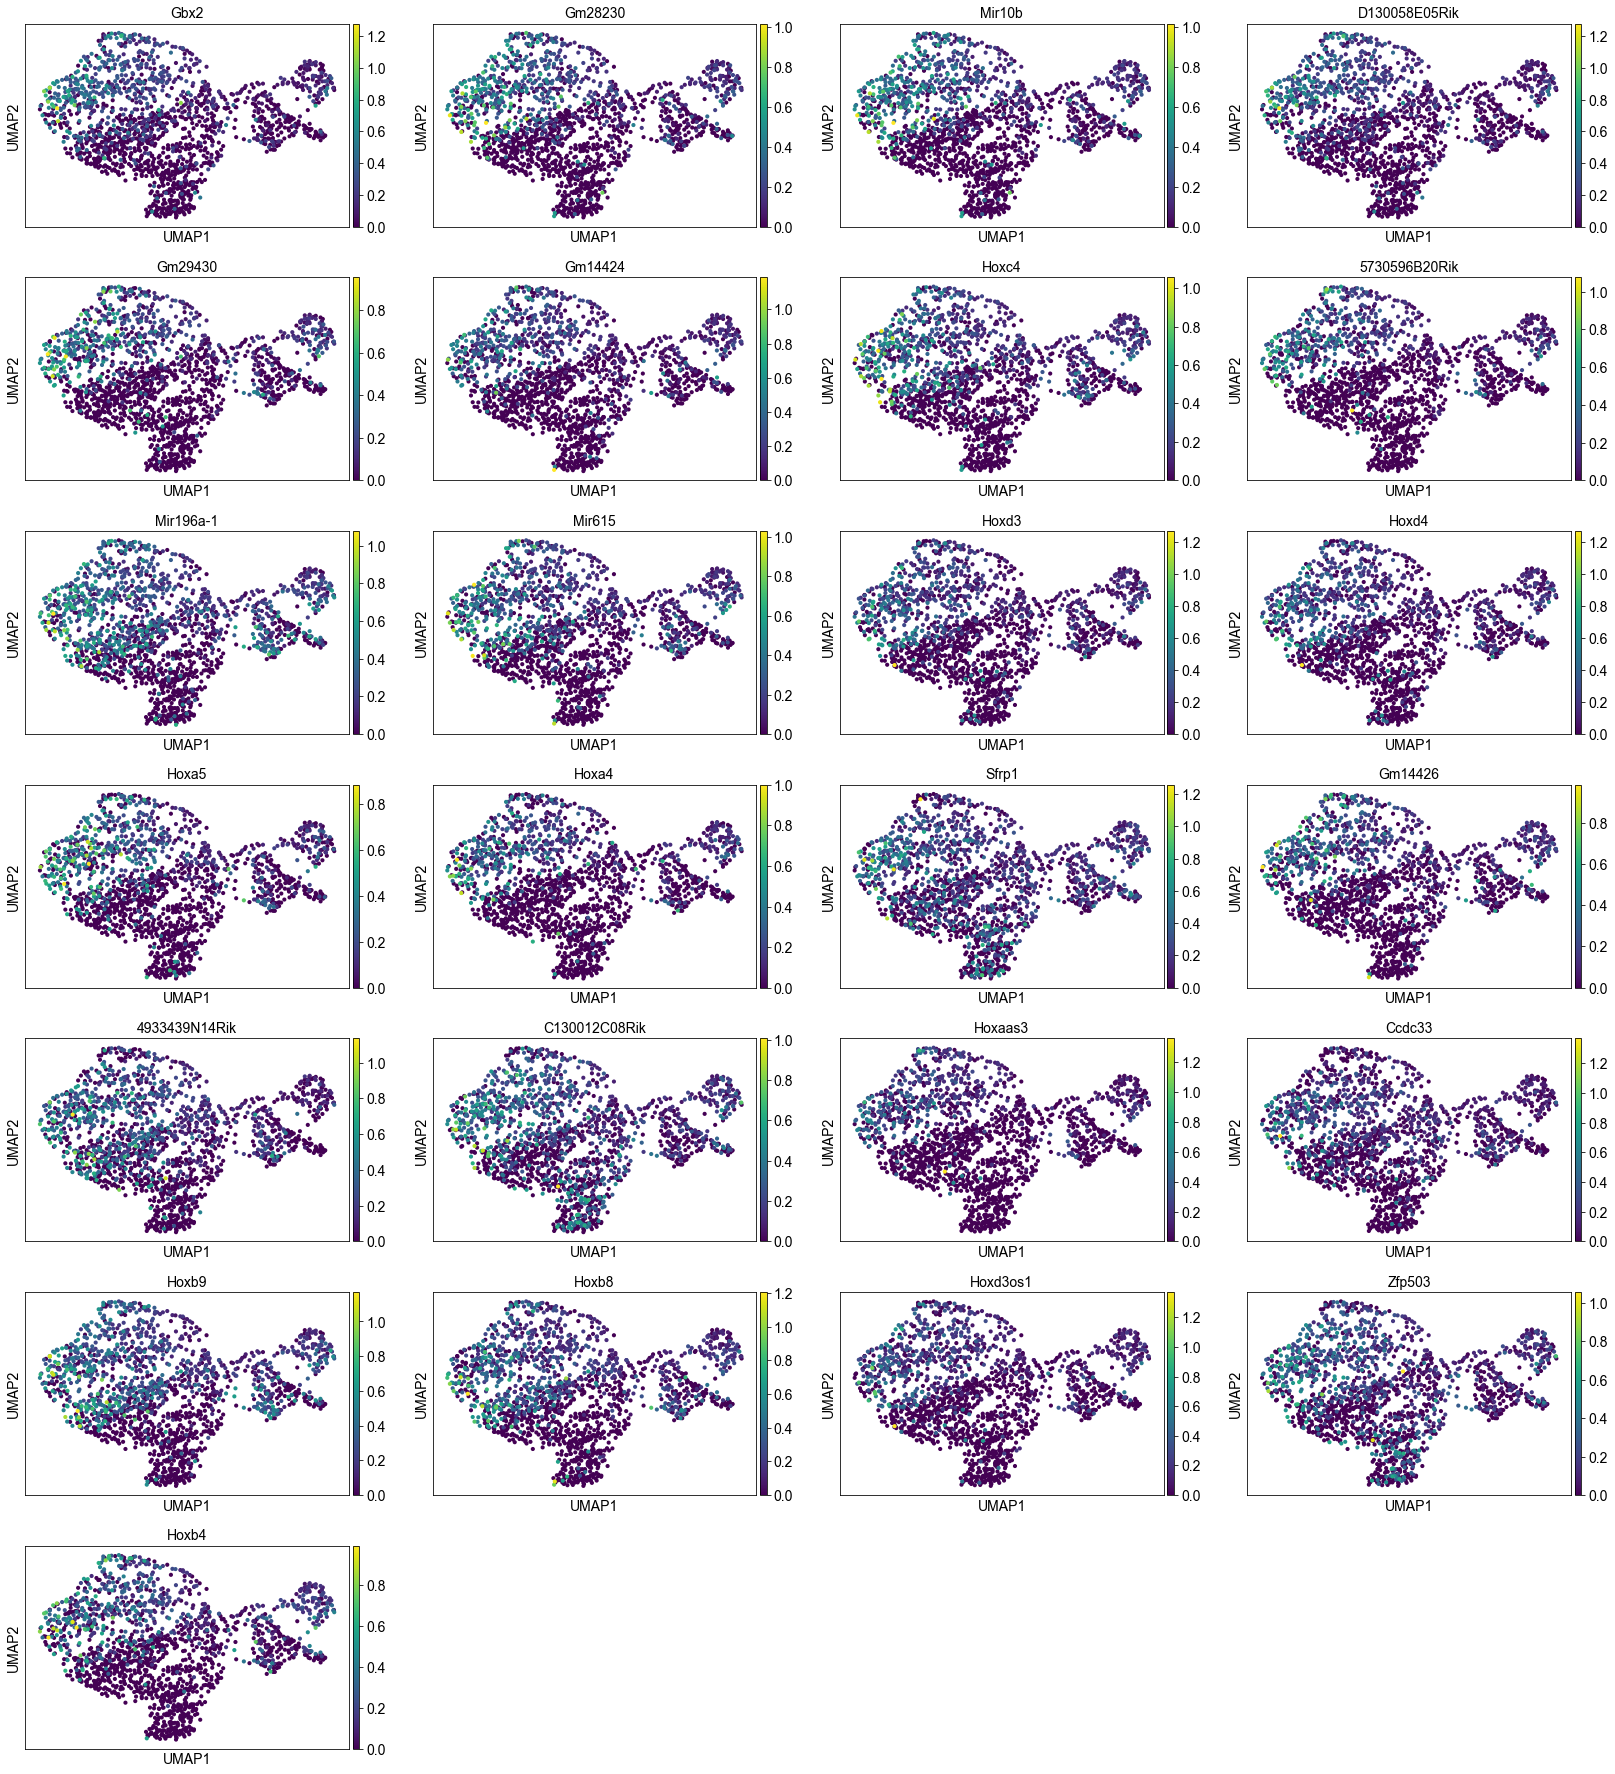

In [52]:
cluster = '1'
number_genes = 25

adata = sc.read(results_file)
genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])[cluster].head(number_genes)
sc.pl.umap(adata, color=genes, color_map = 'viridis')

In [53]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

0_n           0_p            1_n           1_p      2_n           2_p  \
0   Gm5743  1.030533e-10           Gbx2  3.451621e-34    Alox8  1.757247e-18   
1    Pcgf5  8.597810e-09        Gm28230  7.535105e-31    Ush1g  9.437387e-17   
2  Gm47735  1.109154e-08         Mir10b  1.158637e-30    Obscn  9.776321e-17   
3   Atp1b1  1.960159e-07  D130058E05Rik  2.737783e-30  Gm11429  1.593155e-16   
4   Hoxc10  2.231438e-07        Gm29430  4.770072e-30      Ppy  1.954041e-16   

       3_n           3_p            4_n           4_p       5_n           5_p  \
0     Sox1  8.275545e-20         Lhx1os  2.359486e-28   Gm12748  2.651331e-17   
1  Gm45560  2.404491e-17           Lhx1  3.141405e-28   Gm49153  5.180689e-14   
2    Tbx20  2.413941e-17        Gm23469  1.004665e-24  Hand2os1  1.021307e-12   
3  Gm29824  1.123469e-16  4930431L21Rik  1.767605e-24     Pkdcc  3.695383e-12   
4  Gm25239  1.810564e-16        Tbx3os2  2.824426e-24      Tlx1  5.569350e-12   

             6_n           6_p            7_n           7_p      8_n  \
0          Hoxa5  3.729351e-18        Gm38042  1.217545e-20  Gm36367   
1          Hoxa4  2.478246e-17         Lrrc18  1.987382e-15  Gm29629   
2  D130058E05Rik  5.315602e-17        Gm43188  2.932943e-14    Cdk18   
3           Gbx2  1.812736e-15        Gm12748  3.556817e-14   Gm5743   
4     AC145554.1  7.032274e-15  C130075A20Rik  3.877522e-14   Zdhhc1   

            8_p      9_n           9_p     10_n          10_p     11_n  \
0  1.253294e-13  Gm16675  8.361391e-31  Gm27867  2.743144e-20   Traj33   
1  1.561853e-09     Irf2  2.473850e-30    Hoxb2  6.303244e-20   Traj34   
2  1.780047e-09    Hoxb1  3.455710e-30  Gm47092  1.934819e-19  Gm47836   
3  2.402952e-09  Gm27761  1.544329e-27    Hoxa1  2.173626e-19   Traj32   
4  7.292661e-09     Trio  1.323604e-25  Gm19208  5.409970e-19  Pik3c2b   

           11_p  
0  3.914209e-27  
1  1.254013e-26  
2  2.289358e-26  
3  2.331709e-26  
4  1.595524e-25

In [54]:
rank_genes_groups = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})

rank_genes_groups.head()

0_n           0_p            1_n           1_p      2_n           2_p  \
0   Gm5743  1.030533e-10           Gbx2  3.451621e-34    Alox8  1.757247e-18   
1    Pcgf5  8.597810e-09        Gm28230  7.535105e-31    Ush1g  9.437387e-17   
2  Gm47735  1.109154e-08         Mir10b  1.158637e-30    Obscn  9.776321e-17   
3   Atp1b1  1.960159e-07  D130058E05Rik  2.737783e-30  Gm11429  1.593155e-16   
4   Hoxc10  2.231438e-07        Gm29430  4.770072e-30      Ppy  1.954041e-16   

       3_n           3_p            4_n           4_p       5_n           5_p  \
0     Sox1  8.275545e-20         Lhx1os  2.359486e-28   Gm12748  2.651331e-17   
1  Gm45560  2.404491e-17           Lhx1  3.141405e-28   Gm49153  5.180689e-14   
2    Tbx20  2.413941e-17        Gm23469  1.004665e-24  Hand2os1  1.021307e-12   
3  Gm29824  1.123469e-16  4930431L21Rik  1.767605e-24     Pkdcc  3.695383e-12   
4  Gm25239  1.810564e-16        Tbx3os2  2.824426e-24      Tlx1  5.569350e-12   

             6_n           6_p            7_n           7_p      8_n  \
0          Hoxa5  3.729351e-18        Gm38042  1.217545e-20  Gm36367   
1          Hoxa4  2.478246e-17         Lrrc18  1.987382e-15  Gm29629   
2  D130058E05Rik  5.315602e-17        Gm43188  2.932943e-14    Cdk18   
3           Gbx2  1.812736e-15        Gm12748  3.556817e-14   Gm5743   
4     AC145554.1  7.032274e-15  C130075A20Rik  3.877522e-14   Zdhhc1   

            8_p      9_n           9_p     10_n          10_p     11_n  \
0  1.253294e-13  Gm16675  8.361391e-31  Gm27867  2.743144e-20   Traj33   
1  1.561853e-09     Irf2  2.473850e-30    Hoxb2  6.303244e-20   Traj34   
2  1.780047e-09    Hoxb1  3.455710e-30  Gm47092  1.934819e-19  Gm47836   
3  2.402952e-09  Gm27761  1.544329e-27    Hoxa1  2.173626e-19   Traj32   
4  7.292661e-09     Trio  1.323604e-25  Gm19208  5.409970e-19  Pik3c2b   

           11_p  
0  3.914209e-27  
1  1.254013e-26  
2  2.289358e-26  
3  2.331709e-26  
4  1.595524e-25

ranking genes
    finished (0:00:01)


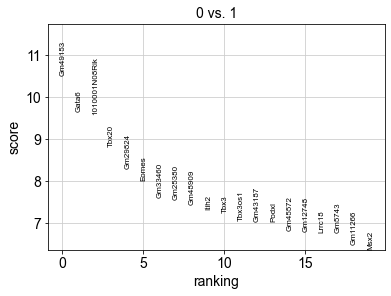

In [55]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)